In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import cv2 as cv
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [3]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [4]:
X_train = X_train.astype('float32') / 255.0
Y_test = X_test.astype('float32') / 255.0

(28, 28, 1)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


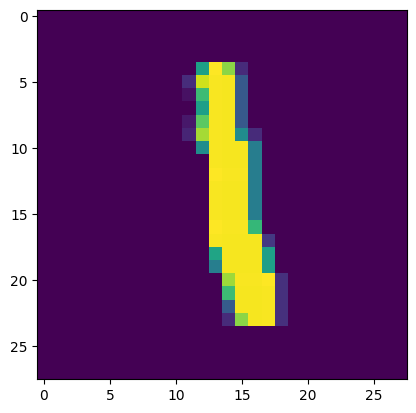

In [4]:
# sample from dataset
sample = 6
print(X_train[sample].shape)

print(Y_train[sample])
plt.imshow(X_train[sample])
plt.show()
# np.argmax(model.predict(X_train[sample].reshape(1, width, height)))

(28, 28)


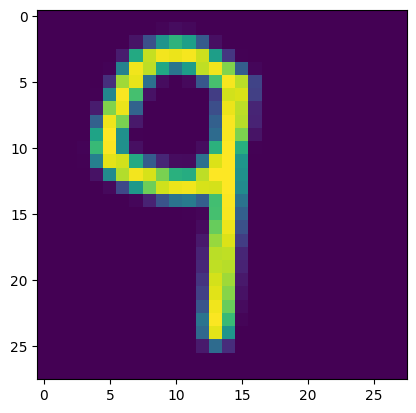

In [5]:
# just verifing with own samples

reduced_img = plt.imread('reduced.png')
print(reduced_img.shape)
plt.imshow(reduced_img)
plt.show()

In [10]:
# Creating a model in tensorflow

model = Sequential([
    layers.Flatten( input_shape=(28, 28, 1)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation = 'relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_________________________________________________________________


In [14]:

model.compile(
    
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0316 - accuracy: 0.8045
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2883 - accuracy: 0.9218
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1981 - accuracy: 0.9455
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1566 - accuracy: 0.9557


In [16]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

model.save('output/digit_recognizer_2.h5')


313/313 - 0s - loss: 0.1652 - accuracy: 0.9564 - 486ms/epoch - 2ms/step


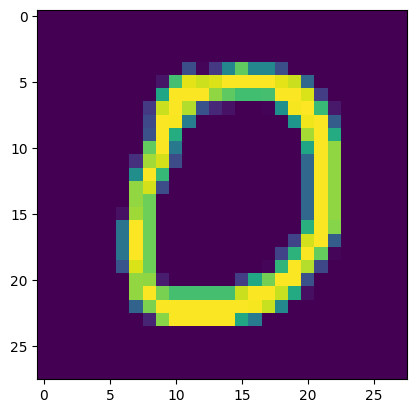

1/1 [==============================] - 0s 17ms/step
0


In [ ]:


test_sample = 10
test_imag = X_test[test_sample]
plt.imshow(test_imag)

plt.show()
yhat = np.argmax(model.predict(test_imag.reshape(1, width, height)))
print(yhat)

1/1 [==============================] - 0s 19ms/step
2


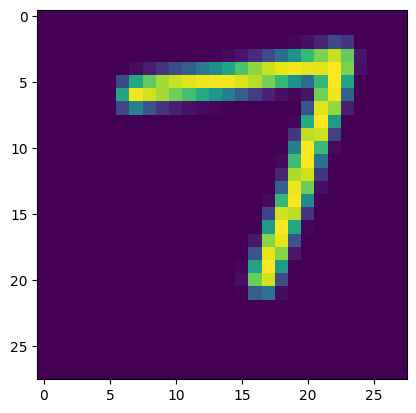

In [ ]:
test_image = plt.imread('reduced.png')
yhat = model.predict(test_image.T.reshape(1, width, height))
plt.imshow(test_image)

print(np.argmax(yhat))

In [17]:

import cv2

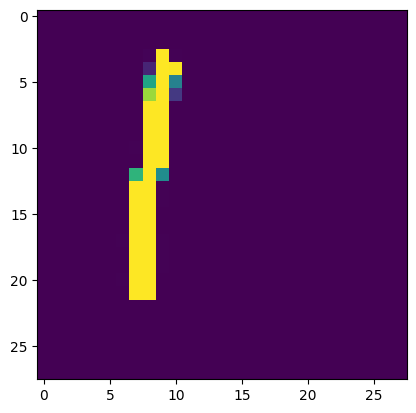

In [36]:
img = cv2.imread('./image.jpg')

plt.imshow(gray_img_resized/255.0)